In [115]:
#import necessary libraries for regression analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('bmh')

from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import scipy.stats as stats
from sklearn.model_selection import train_test_split

import pylab
from modelCustomFunctions import create_ols, check_resid_distribution, check_features_vif, get_low_pval_features

In [116]:
df = pd.read_csv('Cleaned_Data_w_Outliers', index_col=0)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 18 columns):
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
renovated        21420 non-null int64
dtypes: float64(7), int64(11)
memory usage: 3.1 MB


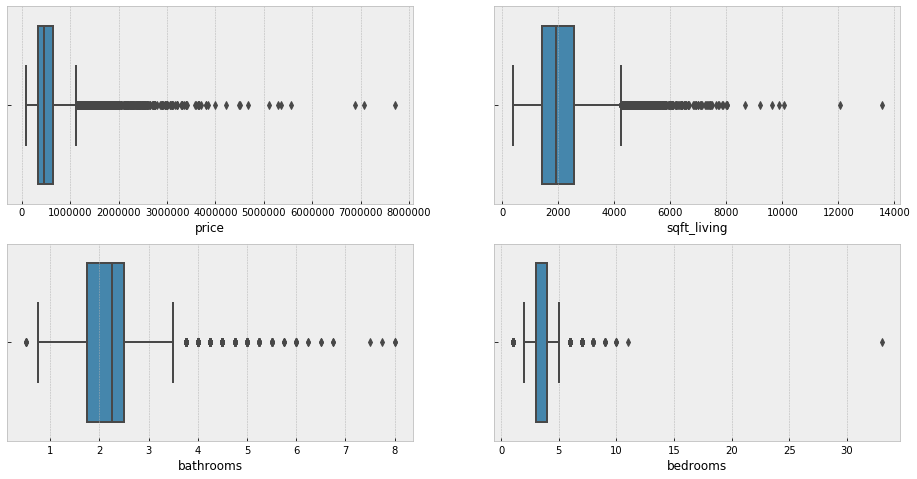

In [3]:
#Looking for Outliers
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.boxplot(x=df['price'])
plt.subplot(222)
sns.boxplot(x=df['sqft_living'])
plt.subplot(223)
sns.boxplot(x=df['bathrooms'])
plt.subplot(224)
sns.boxplot(x=df['bedrooms'])


In [118]:
#Remove outliers
df = df[df["price"] < 700000]
df = df[df["bedrooms"] < 10]
df = df[df["sqft_living"] < 10000]

In [119]:
#Also, drop the yr_renoavted column since we have a new feature called 'renovated'
df = df.drop(columns = 'yr_renovated')

In [120]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503,0


In [121]:
df.nunique() #looking at unique values in each column

price            2689
bedrooms            9
bathrooms          22
sqft_living       781
sqft_lot         8020
floors              6
waterfront          2
view                5
condition           5
grade               9
sqft_above        730
sqft_basement     236
yr_built          116
zipcode            69
sqft_living15     616
sqft_lot15       7104
renovated           3
dtype: int64

### Assumptions Check: Linearity and Multicolinearity

In [122]:
con_feats = ['sqft_living', 'sqft_lot','sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15']
cat_feats = ['bedrooms', 'bathrooms', 'floors','waterfront','view','condition','grade', 'yr_built', 'zipcode', 'renovated']

In [123]:
target = "price"
features = list(df.columns)
features.remove(target)

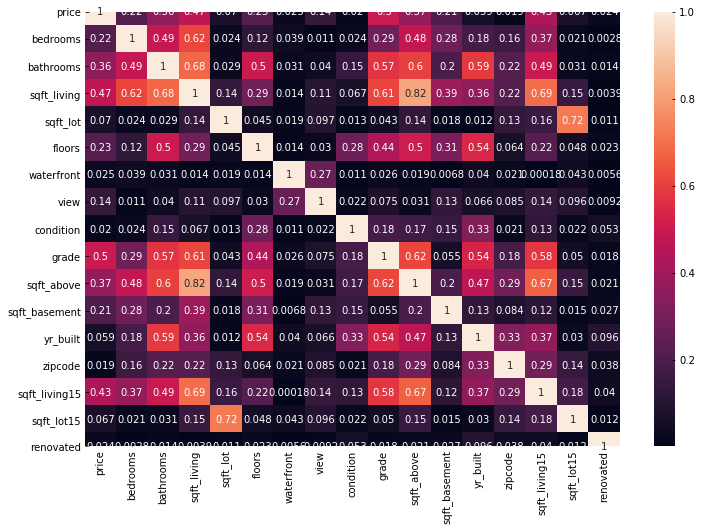

In [124]:
#explore features with high correlation 
corr = df.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
plt.show()

In [125]:
#Check Multicolinearity

check_features_vif(df, target)

,VIF Factor,features
0,26.6,bedrooms
1,27.7,bathrooms
2,875.0,sqft_living
3,2.4,sqft_lot
4,16.5,floors
5,1.1,waterfront
6,1.2,view
7,34.2,condition
8,155.7,grade
9,664.9,sqft_above


['sqft_living',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'sqft_living15']

In [126]:
#Remove features that are highly correlated with one another
df = df.drop(columns = ['sqft_above','sqft_basement','sqft_living15'])

In [127]:
check_features_vif(df, target)

,VIF Factor,features
0,26.5,bedrooms
1,26.7,bathrooms
2,26.0,sqft_living
3,2.4,sqft_lot
4,13.2,floors
5,1.1,waterfront
6,1.2,view
7,34.0,condition
8,146.9,grade
9,9747.9,yr_built


['condition', 'grade', 'yr_built', 'zipcode']

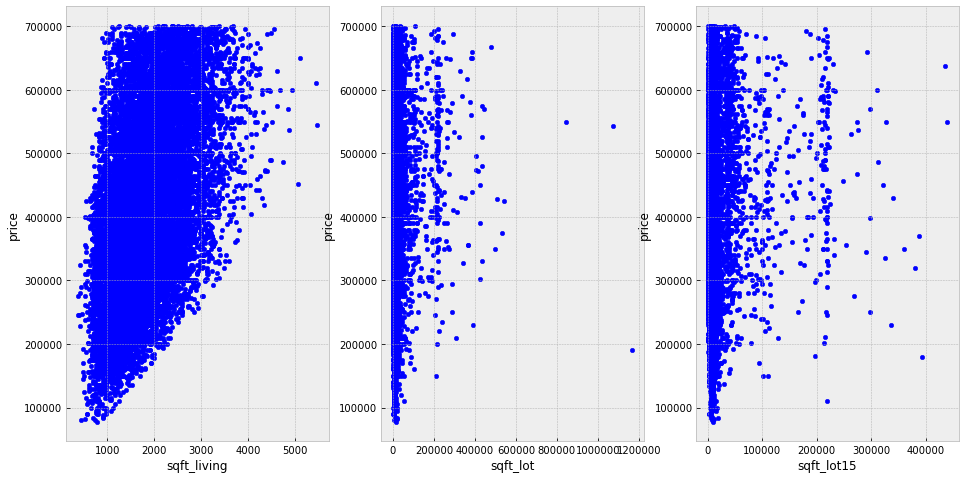

In [128]:
fig, axs = plt.subplots(1, 3,)
df.plot(kind='scatter', x='sqft_living', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='sqft_lot', y='price', ax=axs[1])
df.plot(kind='scatter', x='sqft_lot15', y='price', ax=axs[2])

In [129]:
def check_homoskedasticity(model, df, target : "", features):
    
    """Input: 
    model: an sm.OLS model  
    df: a data frame
    target : a string 
    features: the features of the model 
    
    Retrun: 
    True if 
    False  
    Prints out P-value and F-statistic
    ------------------------
    Uses the Breusch–Pagan test. If p-value is below 0.05, then 
    the null hypothesis of homoskedasticity is rejected and 
    heteroskedasticity is assumed.
    """ 
    
    #Plot scatter plot
    y_hat = df[target] - model.predict(df[features])
            
    plt.scatter(model.predict(df[features]), y_hat, alpha = 0.2)
    plt.plot(model.predict(df[features]), [0 for i in range(len(df))])
    plt.show()

    #run Pegan test
    _, pval, _, f_pval = diag.het_breuschpagan(model.resid, model.model.exog)
    
    print('-'*50)
    print('The P-value is: {:.2}'.format(pval))
    print('The F-statistic is {:.2}'.format(f_pval))
    print('-'*50)
    
    if pval >= 0.05:
    
        print("The p-value is above 0.05, thus we fail to reject the null hypothesis of homoskedasticity")
        return True

    return False

### Baseline Model

In [130]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
baseline = create_ols(df, target)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     847.1
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:53:04   Log-Likelihood:            -2.2137e+05
No. Observations:               17021   AIC:                         4.428e+05
Df Residuals:                   17007   BIC:                         4.429e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.387e+07   1.69e+06     -8.208      

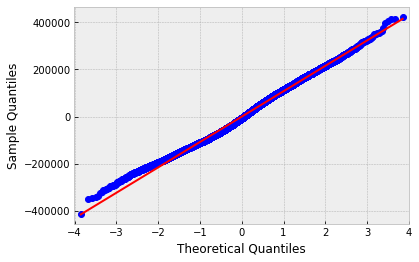

The mean of the residuals is: 2.5e-08. The closer to 0, the better.


In [18]:
check_resid_distribution(baseline)

In [19]:
features = list(df.columns)
features.remove(target)

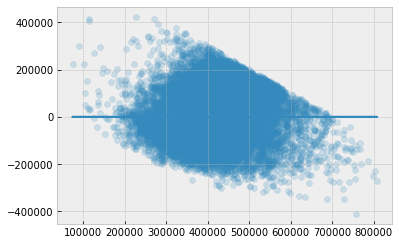

--------------------------------------------------
The P-value is: 2.2e-73
The F-statistic is 3e-74
--------------------------------------------------


False

In [20]:
check_homoskedasticity(baseline,df,target,features)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [22]:
X = df.drop('price', axis=1)
y = df['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# train model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# make predictions
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# calculate residuals 
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)



Train Root Mean Squarred Error: 107325.66818876112
Test Root Mean Squarred Error: 109079.75943863098


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from itertools import combinations
from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline


0.3915806918897551

### Model 1

In [26]:
#adding a new feature "grade_binned" that categorizes the 'grade' variable into 3 categories: 
#value will be 0 if construction quality is low, 1 if construction quality is average, 
#and 2 if construction quality is high 
df['grade_binned'] = df['grade'].apply(lambda x: 0 if x <= 6 else 1 if x >= 7 and x < 11 else 2)
df['grade_binned'].value_counts()

1    14780
0     2233
2        8
Name: grade_binned, dtype: int64

In [27]:
df['condition_binned'] = df['condition'].apply(lambda x: 0 if x <= 2 else 1 if x == 3 else 2)
df['condition_binned'].value_counts()

1    11051
2     5788
0      182
Name: condition_binned, dtype: int64

In [28]:
df['floors_binned'] = df['floors'].apply(lambda x: 0 if x <= 1 else 1 if x >= 1.5 and x < 2.5 else 2)
df['floors_binned'].value_counts()

0    9435
1    7016
2     570
Name: floors_binned, dtype: int64

In [29]:
df['home_age'] = df['yr_built'].apply(lambda x: 2015 - x)

(array([2630., 1934., 2178., 2129., 2762., 2155., 1146.,  791.,  704.,
         592.]),
 array([  0. ,  11.5,  23. ,  34.5,  46. ,  57.5,  69. ,  80.5,  92. ,
        103.5, 115. ]),
 <a list of 10 Patch objects>)

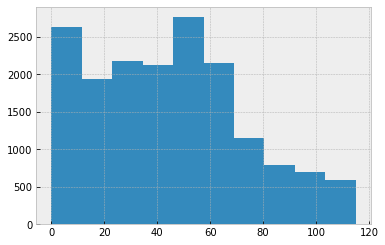

In [30]:
plt.hist(df.home_age)

In [31]:
df['home_age_binned'] = df['home_age'].apply(lambda x: 0 if x <= 20 else 1 if x > 20 and 
                                               x <= 40 else 2 if x > 40 and x <= 60 else 3 if x > 60 and x <= 80
                                              else 4 if x > 80 and x <= 100 else 5)
df['home_age_binned'].value_counts()

0    4205
1    4089
2    3906
3    2734
4    1371
5     716
Name: home_age_binned, dtype: int64

In [32]:
df.drop(['grade', 'condition', 'floors', 'home_age', 'yr_built'], axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17021 entries, 0 to 21596
Data columns (total 14 columns):
price               17021 non-null float64
bedrooms            17021 non-null int64
bathrooms           17021 non-null float64
sqft_living         17021 non-null int64
sqft_lot            17021 non-null int64
waterfront          17021 non-null float64
view                17021 non-null float64
zipcode             17021 non-null int64
sqft_lot15          17021 non-null int64
renovated           17021 non-null int64
grade_binned        17021 non-null int64
condition_binned    17021 non-null int64
floors_binned       17021 non-null int64
home_age_binned     17021 non-null int64
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [34]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'zipcode', 'sqft_lot15', 'renovated',
       'grade_binned', 'condition_binned', 'floors_binned', 'home_age_binned'],
      dtype='object')

In [35]:
grade_dummies = pd.get_dummies(df.grade_binned, prefix='grade', drop_first=True)
condition_dummies = pd.get_dummies(df.condition_binned, prefix='condition', drop_first=True)
floors_dummies = pd.get_dummies(df.floors_binned, prefix='floors', drop_first=True)
home_age_dummies = pd.get_dummies(df.home_age_binned, prefix='home_age', drop_first=True)
renovated_dummies = pd.get_dummies(df.renovated, prefix='renovated', drop_first=True)

In [36]:
df = df.join([grade_dummies, condition_dummies, floors_dummies, home_age_dummies, renovated_dummies])
df = df.drop(['grade_binned', 'condition_binned', 'floors_binned', 'home_age_binned', 'renovated'], axis=1)

In [37]:
model1 = create_ols(df,target)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     431.9
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:55:09   Log-Likelihood:            -2.2198e+05
No. Observations:               17021   AIC:                         4.440e+05
Df Residuals:                   16999   BIC:                         4.442e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.173e+07   1.82e+06     -6.448      

### Model 2

In [38]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'sqft_lot15',
 'renovated']

Continuous columns: 'sqft_living', 'sqft_lot', 'price'

(0, 10000)

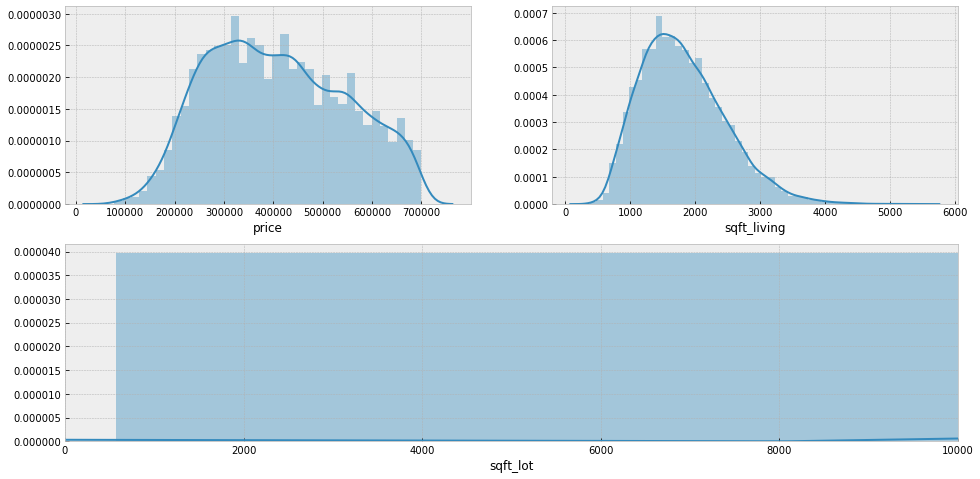

In [39]:
#Exploring distributions of continuous variables
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(df.price, label='Prices')
plt.subplot(222)
sns.distplot(df.sqft_living, label='Sqft Living')
plt.subplot(212)
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.xlim(0, 10000)

In [40]:
# Convert to logs
price = np.log(df.price)
sqft_living = np.log(df.sqft_living)
sqft_lot = np.log(df.sqft_lot)

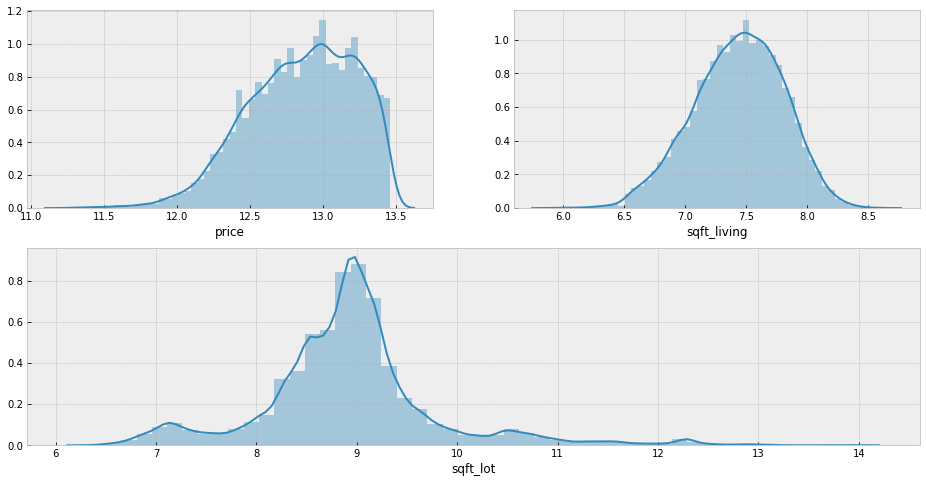

In [41]:
#Comparing the distributions
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(price, label='Prices')
plt.subplot(222)
sns.distplot(sqft_living, label='Sqft Living')
plt.subplot(212)
sns.distplot(sqft_lot, label='Sqft Lot')

In [42]:
#Next, do min-max transformation:

# df['price'] = ( price - min(price) ) / ( max(price) - min(price) )
# df['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )
# df['sqft_lot'] = ( sqft_lot - min(sqft_lot) ) / ( max(sqft_lot) - min(sqft_lot) )

df['sqft_living'] = sqft_living
df['sqft_lot'] =sqft_lot
df['price']= price

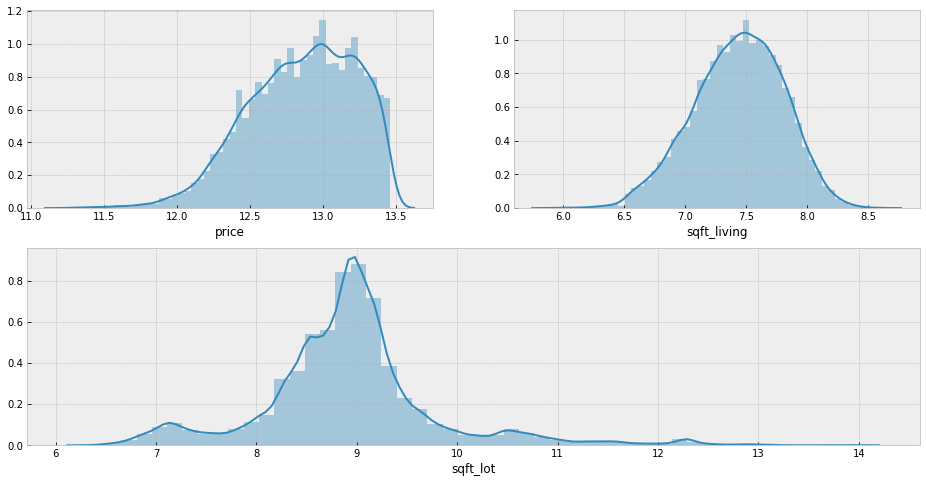

In [43]:
#Preview new distributions after min-max scaling
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(df.price, label='Prices')
plt.subplot(222)
sns.distplot(df.sqft_living, label='Sqft Living')
plt.subplot(212)
sns.distplot(df.sqft_lot, label='Sqft Lot')

In [44]:
model2 = create_ols(df,target)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     466.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:55:16   Log-Likelihood:                -3136.6
No. Observations:               17021   AIC:                             6317.
Df Residuals:                   16999   BIC:                             6487.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -23.1880      4.830     -4.800      

### Model 3

In [45]:
print(df.bathrooms.value_counts().idxmax())
print(df.bedrooms.value_counts().idxmax())

2.5
3


In [46]:
# Now take dummies of bathrooms and bedrooms

bedrooms = pd.get_dummies(df.bedrooms, prefix='bedrooms')
bathrooms = pd.get_dummies(df.bathrooms, prefix='bathrooms')

In [47]:
df = df.join([bedrooms, bathrooms])
df.drop(['bedrooms', 'bathrooms'], axis=1, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17021 entries, 0 to 21596
Data columns (total 51 columns):
price             17021 non-null float64
sqft_living       17021 non-null float64
sqft_lot          17021 non-null float64
waterfront        17021 non-null float64
view              17021 non-null float64
zipcode           17021 non-null int64
sqft_lot15        17021 non-null int64
grade_1           17021 non-null uint8
grade_2           17021 non-null uint8
condition_1       17021 non-null uint8
condition_2       17021 non-null uint8
floors_1          17021 non-null uint8
floors_2          17021 non-null uint8
home_age_1        17021 non-null uint8
home_age_2        17021 non-null uint8
home_age_3        17021 non-null uint8
home_age_4        17021 non-null uint8
home_age_5        17021 non-null uint8
renovated_1       17021 non-null uint8
renovated_2       17021 non-null uint8
bedrooms_1        17021 non-null uint8
bedrooms_2        17021 non-null uint8
bedrooms_3        17021

In [49]:
subs = [('.','')]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [50]:
# Drop one dummy to avoid the dummy variable trap. We will drop the most frequent value for each feature
df = df.drop(['bathrooms_25', 'bedrooms_3'], axis=1)

In [51]:
model3 = create_ols(df,target)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     207.6
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:55:17   Log-Likelihood:                -3075.9
No. Observations:               17021   AIC:                             6250.
Df Residuals:                   16972   BIC:                             6629.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -22.7323      4.835     -4.702


### Model 4: Interactions?

In [52]:
# X = df.drop('price', axis=1)
# y = df['price']

In [53]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score
# from itertools import combinations
# from sklearn.model_selection import KFold

# regression = LinearRegression()

# interactions = []

# feat_combinations = combinations(X.columns, 2)


# data = X.copy()


# for i, (a, b) in enumerate(feat_combinations):
#     data['interaction'] = data[a] * data[b]
#     score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
#     if score > baseline:
#         interactions.append((a, b, round(score,5)))
    
#     if i % 50 == 0:
#         print(i)
            
# print('Top 8 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:8])

In [54]:
# #Add some interactions to model that we think could improve our predictions: 
# df2 = X.copy()

# df2['sqft_living*grade'] = df2['sqft_living'] * df2['grade']
# df2['sqft_living*bathrooms'] = df2['sqft_living'] * df2['bathrooms']
# df2['sqft_living*view'] = df2['sqft_living'] * df2['view']
# df2['floors*yr_built'] = df2['floors'] * df2['yr_built']
# df2['bathrooms*grade'] = df2['grade'] * df2['bathrooms']




# df2_model = np.mean(cross_val_score(regression, df2, y, scoring='r2', cv=crossvalidation))

# df2_model

## Old work

In [55]:
# df.renovated = df.renovated.astype('category')
# df.grade_binned = df.grade_binned.astype('category')
# df.condition_binned = df.condition_binned.astype('category')
# df.floors_binned = df.floors_binned.astype('category')
# df.home_age_binned = df.home_age_binned.astype('category')
# df.waterfront = df.waterfront.astype('category')

In [56]:
# columns = ['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 
#            'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bathrooms_1', 
#            'bathrooms_2', 'bathrooms_3', 'bathrooms_4', 'bathrooms_5', 'bathrooms_7']

# df2 = df[columns]


In [57]:
# df.info()

##### Train test split

In [58]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

In [59]:
# X = df.drop('price', axis=1)
# y = df['price']

In [60]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# # train model
# linreg = LinearRegression()
# linreg.fit(X_train, y_train)

# # make predictions
# y_hat_train = linreg.predict(X_train)
# y_hat_test = linreg.predict(X_test)

# # calculate residuals 
# train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
# test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
# print('Train Root Mean Squarred Error:', train_rmse)
# print('Test Root Mean Squarred Error:', test_rmse)



In [62]:

# # undo log transform on predictions for familiar units
# y_hat_train = np.exp(y_hat_train)
# y_hat_test = np.exp(y_hat_test)

# # now undo log transform actual y values
# y_train = np.exp(y_train)
# y_test = np.exp(y_test)

# # calculate residuals
# train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
# test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
# print('Train Root Mean Squarred Error:', train_rmse)
# print('Test Root Mean Squarred Error:', test_rmse)

### Handling Zip Codes

In [63]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine()

In [64]:
def zco(x):
    city = search.by_zipcode(x).city
    return city if city else x 

In [65]:
df['city'] = df.zipcode.apply(zco)

In [66]:
df.city.value_counts()

Seattle          7187
Renton           1487
Kent             1184
Auburn            896
Federal Way       762
Kirkland          707
Bellevue          614
Redmond           593
Maple Valley      569
Issaquah          552
Sammamish         415
Woodinville       333
Kenmore           270
Snoqualmie        269
Enumclaw          228
North Bend        200
Duvall            186
Bothell           182
Carnation         109
Vashon            102
Black Diamond      88
Fall City          58
Mercer Island      30
Name: city, dtype: int64

In [67]:
df.city = df.city.astype('category')

In [68]:
city = pd.get_dummies(df.city, prefix='city')

In [69]:
df_new = pd.concat([df, city], axis=1)

In [70]:
df_new = df_new.drop(columns = ['zipcode','city','city_Seattle'])

In [71]:
subs2 = [(' ','_')]
def col_formatting(col):
    for old, new in subs2:
        col = col.replace(old,new)
    return col

df_new.columns = [col_formatting(col) for col in df_new.columns]

In [72]:
df_new.columns

Index(['price', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_lot15',
       'grade_1', 'grade_2', 'condition_1', 'condition_2', 'floors_1',
       'floors_2', 'home_age_1', 'home_age_2', 'home_age_3', 'home_age_4',
       'home_age_5', 'renovated_1', 'renovated_2', 'bedrooms_1', 'bedrooms_2',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8',
       'bedrooms_9', 'bathrooms_05', 'bathrooms_075', 'bathrooms_10',
       'bathrooms_125', 'bathrooms_15', 'bathrooms_175', 'bathrooms_20',
       'bathrooms_225', 'bathrooms_275', 'bathrooms_30', 'bathrooms_325',
       'bathrooms_35', 'bathrooms_375', 'bathrooms_40', 'bathrooms_425',
       'bathrooms_45', 'bathrooms_475', 'bathrooms_50', 'bathrooms_525',
       'bathrooms_575', 'bathrooms_75', 'city_Auburn', 'city_Bellevue',
       'city_Black_Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall_City', 'city_Federal_Way', 'city_Issaquah',
       'city_Kenmore', 'cit

In [73]:
test_model = create_ols(df_new,target)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     397.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:55:56   Log-Likelihood:                 1179.7
No. Observations:               17021   AIC:                            -2219.
Df Residuals:                   16951   BIC:                            -1678.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.2516      0

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [75]:
X = df_new.drop('price', axis=1)
y = df_new['price']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# train model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# make predictions
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# calculate residuals 
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)



Train Root Mean Squarred Error: 0.22612029615668652
Test Root Mean Squarred Error: 0.22478538261866843


In [78]:

# undo log transform on predictions for familiar units
y_hat_train = np.exp(y_hat_train)
y_hat_test = np.exp(y_hat_test)

# now undo log transform actual y values
y_train = np.exp(y_train)
y_test = np.exp(y_test)

# calculate residuals
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Root Mean Squarred Error: 87596.30715792827
Test Root Mean Squarred Error: 87540.45523396127


In [83]:
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     397.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:57:37   Log-Likelihood:                 1179.7
No. Observations:               17021   AIC:                            -2219.
Df Residuals:                   16951   BIC:                            -1678.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.2516      0.065    142.674      0.000       9.124       9.379
sqft_living            0.4360      0.009     49.643      0.000       0.419       0.453
sqft_lot               0.0077      0.004      2.120      0.034       0.001       0.015
waterfront             0.0979      0.048      2.043      0.041       0.004       0.192
view                   0.0508      0.004     14.000      0.000       0.044       0.058
sqft_lot15          8.384e-07      1e-07      8.368      0.000    6.42e-07    1.03e-06
grade_1                0.2162      0.006     33.749      0.000       0.204       0.229
grade_2                0.5261      0.081      6.521      0.000       0.368       0.684
condition_1            0.1824      0.017     10.604      0.000       0.149       0.216
condition_2            0.2361      0.017     13.700      0.000       0.202       0.270
floors_1               0.0173      0.005      3.497      0.000       0.008       0.027
floors_2               0.1191      0.012     10.205      0.000       0.096       0.142
home_age_1            -0.0663      0.006    -10.253      0.000      -0.079      -0.054
home_age_2            -0.1075      0.008    -13.486      0.000      -0.123      -0.092
home_age_3             0.0153      0.009      1.714      0.087      -0.002       0.033
home_age_4             0.1488      0.010     15.575      0.000       0.130       0.168
home_age_5             0.1853      0.011     16.691      0.000       0.164       0.207
renovated_1            0.0488      0.023      2.146      0.032       0.004       0.093
renovated_2            0.0385      0.025      1.520      0.128      -0.011       0.088
bedrooms_1             0.0892      0.018      5.007      0.000       0.054       0.124
bedrooms_2             0.0554      0.006      9.390      0.000       0.044       0.067
bedrooms_4            -0.0124      0.005     -2.680      0.007      -0.021      -0.003
bedrooms_5            -0.0668      0.009     -7.738      0.000      -0.084      -0.050
bedrooms_6            -0.0915      0.020     -4.534      0.000      -0.131      -0.052
bedrooms_7            -0.1017      0.056     -1.818      0.069      -0.211       0.008
bedrooms_8            -0.1755      0.094     -1.860      0.063      -0.360       0.009
bedrooms_9            -0.1168      0.233     -0.501      0.617      -0.574       0.340
bathrooms_05          -0.3129      0.113     -2.757      0.006      -0.535      -0.090
bathrooms_075         -0.0848      0.030     -2.863      0.004      -0.143      -0.027
bathrooms_10          -0.0771      0.009     -8.987      0.000      -0.094      -0.060
bathrooms_125         -0.0301      0.086     -0.351      0.726      -0.198       0.138
bathrooms_15          -0.0835      0.009     -9.816      0.000      -0.100      -0.067
bathrooms_175         -0.0392      0.0

### Drop high p values

In [90]:
get_low_pval_features(test_model)

['sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'sqft_lot15',
 'grade_1',
 'grade_2',
 'condition_1',
 'condition_2',
 'floors_1',
 'floors_2',
 'home_age_1',
 'home_age_2',
 'home_age_4',
 'home_age_5',
 'renovated_1',
 'bedrooms_1',
 'bedrooms_2',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_05',
 'bathrooms_075',
 'bathrooms_10',
 'bathrooms_15',
 'bathrooms_175',
 'bathrooms_20',
 'bathrooms_225',
 'bathrooms_35',
 'city_Auburn',
 'city_Bellevue',
 'city_Black_Diamond',
 'city_Bothell',
 'city_Carnation',
 'city_Duvall',
 'city_Enumclaw',
 'city_Federal_Way',
 'city_Issaquah',
 'city_Kent',
 'city_Kirkland',
 'city_Maple_Valley',
 'city_Mercer_Island',
 'city_North_Bend',
 'city_Redmond',
 'city_Renton',
 'city_Sammamish',
 'city_Snoqualmie',
 'city_Vashon',
 'city_Woodinville']

In [92]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17021 entries, 0 to 21596
Data columns (total 70 columns):
price                 17021 non-null float64
sqft_living           17021 non-null float64
sqft_lot              17021 non-null float64
waterfront            17021 non-null float64
view                  17021 non-null float64
sqft_lot15            17021 non-null int64
grade_1               17021 non-null uint8
grade_2               17021 non-null uint8
condition_1           17021 non-null uint8
condition_2           17021 non-null uint8
floors_1              17021 non-null uint8
floors_2              17021 non-null uint8
home_age_1            17021 non-null uint8
home_age_2            17021 non-null uint8
home_age_3            17021 non-null uint8
home_age_4            17021 non-null uint8
home_age_5            17021 non-null uint8
renovated_1           17021 non-null uint8
renovated_2           17021 non-null uint8
bedrooms_1            17021 non-null uint8
bedrooms_2           

In [102]:
get_low_pval_features(test_model)

['sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'sqft_lot15',
 'grade_1',
 'grade_2',
 'condition_1',
 'condition_2',
 'floors_1',
 'floors_2',
 'home_age_1',
 'home_age_2',
 'home_age_4',
 'home_age_5',
 'renovated_1',
 'bedrooms_1',
 'bedrooms_2',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_05',
 'bathrooms_075',
 'bathrooms_10',
 'bathrooms_15',
 'bathrooms_175',
 'bathrooms_20',
 'bathrooms_225',
 'bathrooms_35',
 'city_Auburn',
 'city_Bellevue',
 'city_Black_Diamond',
 'city_Bothell',
 'city_Carnation',
 'city_Duvall',
 'city_Enumclaw',
 'city_Federal_Way',
 'city_Issaquah',
 'city_Kent',
 'city_Kirkland',
 'city_Maple_Valley',
 'city_Mercer_Island',
 'city_North_Bend',
 'city_Redmond',
 'city_Renton',
 'city_Sammamish',
 'city_Snoqualmie',
 'city_Vashon',
 'city_Woodinville']

In [103]:
columns = ['price', 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'sqft_lot15',
 'grade_1',
 'grade_2',
 'condition_1',
 'condition_2',
 'floors_1',
 'floors_2',
 'home_age_1',
 'home_age_2',
 'home_age_4',
 'home_age_5',
 'renovated_1',
 'bedrooms_1',
 'bedrooms_2',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_05',
 'bathrooms_075',
 'bathrooms_10',
 'bathrooms_15',
 'bathrooms_175',
 'bathrooms_20',
 'bathrooms_225',
 'bathrooms_35',
 'city_Auburn',
 'city_Bellevue',
 'city_Black_Diamond',
 'city_Bothell',
 'city_Carnation',
 'city_Duvall',
 'city_Enumclaw',
 'city_Federal_Way',
 'city_Issaquah',
 'city_Kent',
 'city_Kirkland',
 'city_Maple_Valley',
 'city_Mercer_Island',
 'city_North_Bend',
 'city_Redmond',
 'city_Renton',
 'city_Sammamish',
 'city_Snoqualmie',
 'city_Vashon',
 'city_Woodinville']

In [105]:
df3 = df_new[columns]

In [106]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17021 entries, 0 to 21596
Data columns (total 50 columns):
price                 17021 non-null float64
sqft_living           17021 non-null float64
sqft_lot              17021 non-null float64
waterfront            17021 non-null float64
view                  17021 non-null float64
sqft_lot15            17021 non-null int64
grade_1               17021 non-null uint8
grade_2               17021 non-null uint8
condition_1           17021 non-null uint8
condition_2           17021 non-null uint8
floors_1              17021 non-null uint8
floors_2              17021 non-null uint8
home_age_1            17021 non-null uint8
home_age_2            17021 non-null uint8
home_age_4            17021 non-null uint8
home_age_5            17021 non-null uint8
renovated_1           17021 non-null uint8
bedrooms_1            17021 non-null uint8
bedrooms_2            17021 non-null uint8
bedrooms_4            17021 non-null uint8
bedrooms_5           

In [ ]:
df3 = df3.drop(['sqft_lot15'], axis=1)

In [109]:
model4 = create_ols(df3, target)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     566.5
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:05:40   Log-Likelihood:                 1131.3
No. Observations:               17021   AIC:                            -2165.
Df Residuals:                   16972   BIC:                            -1785.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.1572      0

In [79]:
# from math import sqrt
# #print(f"The MAE score of our test is {test_model.mean_absolute_error(y, y_predicted_single_var)} dollars.")
# print(f"The MSE for the model is: {test_model.mse_total}")
# print(f"The RMSE for the model iss ${sqrt(test_model.mse_total)}")